### import libraries 

In [2]:
#per creare rete
import pandas as pd
from rich import print
import networkx as nx
import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

#per opinion diffusion
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op

#altre
import seaborn as sns
import numpy as np
import math

In [8]:
G=nx.read_gexf('final_net.gexf')
df=pd.read_csv('df_final_nodes.csv')

In [9]:
infected_nodes=[]
for i,c in enumerate(df.category):
    if c=='dontcare' or c=='prorus' or c=='proukr':
        infected_nodes.append(df['node'][i])

# Opinion diffusion

In [4]:
model = op.VoterModel(G)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1) 
#config.add_node_set_configuration('fraction_infected',node_to_value=m.df["class"])

model.set_initial_status(config)

iterations = model.iteration_bunch(1500)
trends = model.build_trends(iterations)

In [5]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

no display found. Using non-interactive Agg backend


C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


# Majotity vote

In [15]:
model = op.MajorityRuleModel(G)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)
config.add_model_initial_configuration('fraction_infected',infected_nodes)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

KeyError: 'fraction_infected'

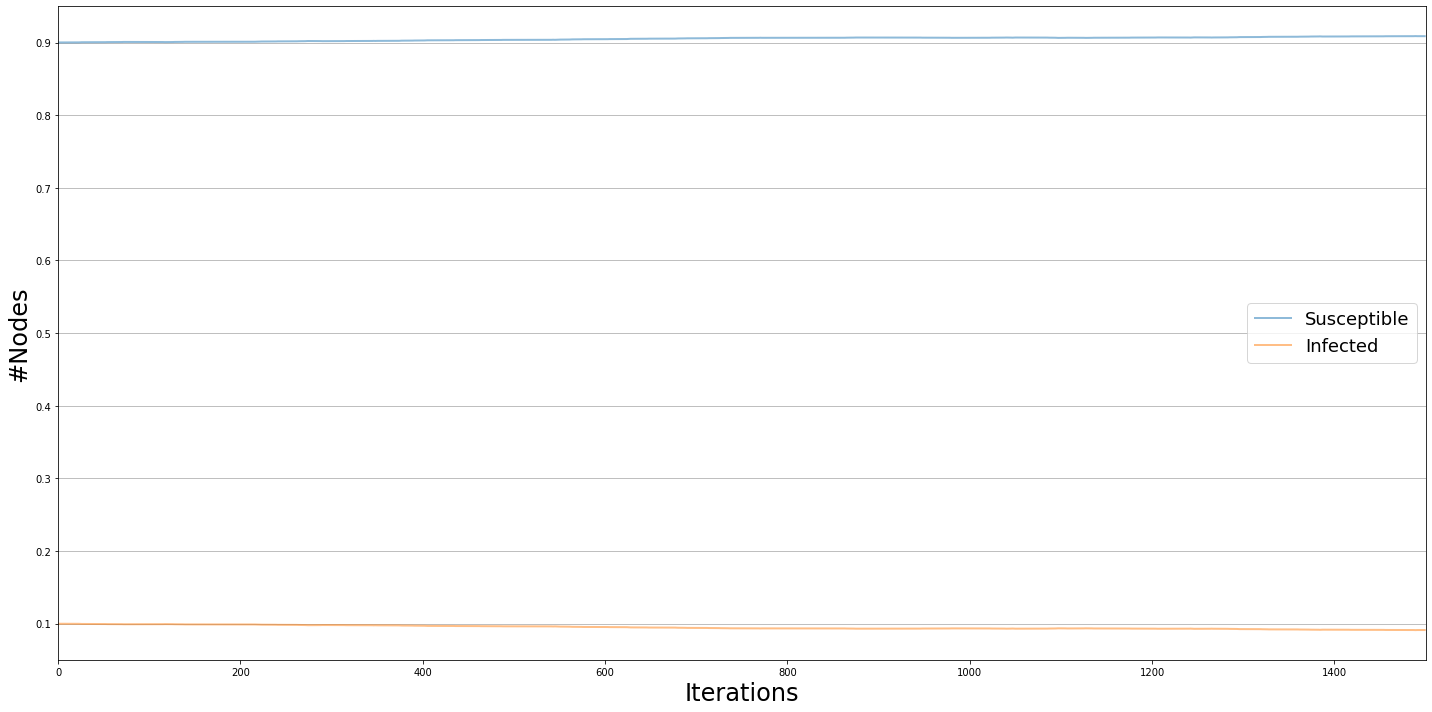

In [12]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()